In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from scipy import stats
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate


def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

# Случайные величины

### 1

In [188]:
mu,sigma=0,2
sample = np.random.normal(mu,sigma,100)
sample[:10]

array([ 2.24690366,  0.65460212,  4.41841997,  0.35238956,  0.02367122,
       -0.17749654, -1.29449466, -1.17774057, -0.02877025,  2.5219548 ])

In [189]:
print(f'Медиана: {np.median(sample)}')
print(f'Среднее: {np.mean(sample)}')
print(f'Дисперсия: {np.var(sample)}')

Медиана: 0.27523603771278066
Среднее: 0.41267108349983117
Дисперсия: 4.173401991103665


### 2

In [190]:
np.mean(np.exp(sample))

10.974928094583287

### 3

In [191]:
sample[sample>0]

array([2.24690366, 0.65460212, 4.41841997, 0.35238956, 0.02367122,
       2.5219548 , 0.82577024, 0.95927941, 1.3150625 , 0.55558994,
       3.76490398, 1.78434107, 1.07611631, 0.32757302, 5.00961659,
       0.85749238, 1.71737694, 2.88025563, 0.86332749, 0.01904308,
       1.20844619, 2.81483685, 0.87131488, 0.34845307, 0.14794591,
       0.94711259, 5.45060773, 1.57779583, 0.91119319, 1.8297037 ,
       3.32878136, 1.08066166, 0.1594172 , 0.04176331, 0.61036012,
       0.33859169, 1.50966645, 2.66166251, 2.18112955, 0.03907378,
       0.22289906, 4.61482209, 1.179036  , 3.67884696, 3.42446985,
       1.87998477, 1.44361818, 2.23325117, 2.3811445 , 1.7195883 ,
       0.20367619, 2.5901344 , 2.77733972, 1.78312027, 1.00020317,
       3.33248214, 0.68107005, 4.6726425 ])

### 4

In [192]:
prefix_sum = [0]
finished=False
for k in range(len(sample)):
    prefix_sum.append(prefix_sum[-1]+sample[k])
    if prefix_sum[-1]>3:
        print(k-1)
        finished=True
        break
if not finished:
    print(len(sample)+1)

1


### 5

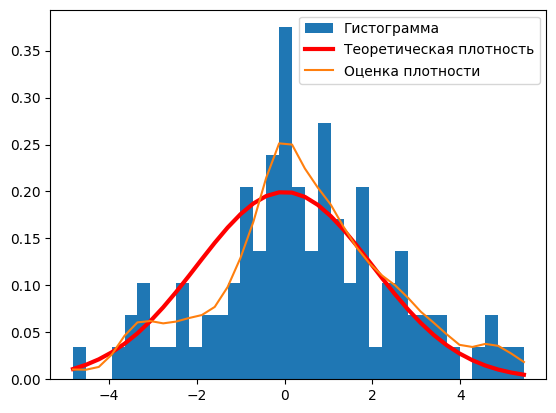

In [193]:
count, bins, ignored = plt.hist(sample, 35, density=True,label='Гистограмма')

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=3, color='r', label = 'Теоретическая плотность')
# плотность 
plt.plot(bins, kde_scipy(sample,bins,0.4), label='Оценка плотности')
plt.legend()
plt.show()

### 6

In [194]:
print(f'P(X > 4) = {sum(sample>4)/len(sample)}')
print(f'P (2 < X < 20) = {sum(sample[2<sample]<20)/len(sample)}')
print(f'P (X < −2) = {sum(sample<-2)/len(sample)}')

P(X > 4) = 0.05
P (2 < X < 20) = 0.2
P (X < −2) = 0.12


### 7

In [195]:
search = np.linspace(-5,5,1000)
for a in search:
    prob = sum(sample>a)/len(sample)
    if prob == 0.3:
        print(a)
        break

1.2162162162162158


### 8

In [196]:
search = np.linspace(-8,5,1000)
for b in search:
    prob = sum(sample[b-4<sample]<b+4)/len(sample)
    if prob==0.3:
        print(b)
        break

-4.434434434434435


### 9

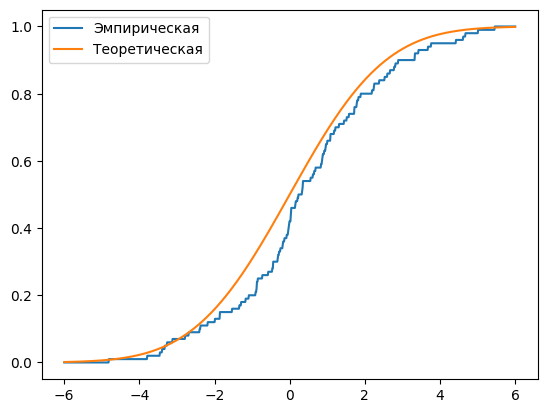

In [197]:
def emperic(x):
    return sum(sample<x)/len(sample)
def theoretical(x):
    norm_rv = stats.norm(loc=mu, scale=sigma)
    return norm_rv.cdf(x)
space = np.linspace(-6,6,1000)
emperic_plot = np.array(list(map(emperic,space)))
plt.plot(space,emperic_plot,label='Эмпирическая')
plt.plot(space,theoretical(space),label='Теоретическая')
plt.legend()
plt.show()